<a href="https://colab.research.google.com/github/nishanth0233/INFO-5502/blob/main/lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [ ]:
import os
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

#1) Number of categories
path = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]")
print('{} categories are present'.format(len(path)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
76 categories are present


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#2) Number of documents under each category
for i in path:
  doc = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]/{}".format((i)))
  print('In file {} we have {} documents'.format(i,len(doc)))

In file 78 we have 242 documents
In file 2 we have 179 documents
In file 47 we have 151 documents
In file 25 we have 244 documents
In file 22 we have 284 documents
In file 13 we have 458 documents
In file 14 we have 277 documents
In file 5 we have 751 documents
In file 49 we have 17 documents
In file 40 we have 510 documents
In file 70 we have 192 documents
In file 76 we have 177 documents
In file 4 we have 231 documents
In file 12 we have 275 documents
In file 23 we have 179 documents
In file 3 we have 184 documents
In file 71 we have 457 documents
In file 24 we have 628 documents
In file 15 we have 257 documents
In file 77 we have 146 documents
In file 53 we have 142 documents
In file 37 we have 74 documents
In file 54 we have 95 documents
In file 30 we have 881 documents
In file 52 we have 318 documents
In file 64 we have 130 documents
In file 55 we have 48 documents
In file 41 we have 1020 documents
In file 39 we have 261 documents
In file 63 we have 204 documents
In file 21 we hav

In [ ]:
#3) Average number of sentence
import pandas as pd
sum = 0

for i in path:
    #print(i)
    doc = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]/{}".format((i)))
    #print(doc)
    try:
        for file in doc:
            filepath = os.path.join("/content/drive/MyDrive/preprocessed_cases[cases_29404]", i, file)
            data = pd.read_csv(filepath, sep="\t")
            sum += data.shape[0]
        #print(sum)
    except:
        print(i, file)
print("The average no of sentences in all categories is:", round(sum/78, 2))
print("The average no of sentences in all files is:", round(sum/29404, 2))

The average no of sentences in all categories is: 7869.67
The average no of sentences in all files is: 20.88


In [ ]:
#4) Average number of words
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
sum = 0
for folder in path:
    doc = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in doc:
            filepath = os.path.join("/content/drive/MyDrive/preprocessed_cases[cases_29404]", folder, file)
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].apply(lambda x: [item for item in x.split() if ((item not in stop) and (len(item)!= 1))])
                
                for sent in data[col]:
                    sum += len(sent)
        #print(sum)
    except Exception as e:
        print(e)
        #print(i, file)
print("The average no of words in all categories is:", round(sum/78, 2))
print("The average no of words in all files is:", round(sum/29404, 2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The average no of words in all categories is: 366926.68
The average no of words in all files is: 973.35


In [ ]:
#5) Top 50 terms & removing stop words first
%pip install stop_words
import re
import pandas as pd
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# creating a set of stop words that are obtained from STOPWORDS and stop_words
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))
# we combien both sets of stopwords to make a corpus of stopwords
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]
print(len(stopwords))
import os

list_of_words = []
path = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]")
# we loop through each file and create a list of words
for folder in path:
    doc = os.listdir("/content/drive/MyDrive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in doc:
            filepath = os.path.join("/content/drive/MyDrive/preprocessed_cases[cases_29404]", folder, file)
            
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].str.lower()
                data[col] = data[col].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
                data[col] = data[col].apply(lambda x: " ".join(item for item in x.split() if ((item not in stopwords) and (len(item)!= 1))))
                
                for sent in data[col]:
                    list_of_words.extend(sent.split())
       
    except Exception as e:
        print(e)

    
    from collections import Counter
# we get the top 50 unique terms and their count
(Counter(list_of_words).most_common(50))

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=559632eb8f51451cd07407037068345df00483685d765791c48c2b168b5f39ed
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
211


[('court', 419819),
 ('district', 176749),
 ('state', 103761),
 ('also', 103509),
 ('whether', 88131),
 ('may', 87282),
 ('evidence', 82226),
 ('law', 80461),
 ('states', 79557),
 ('must', 74633),
 ('federal', 73775),
 ('case', 70335),
 ('claim', 69901),
 ('united', 69842),
 ('claims', 67281),
 ('judgment', 63523),
 ('action', 62632),
 ('one', 62038),
 ('order', 60051),
 ('act', 59688),
 ('trial', 59177),
 ('government', 58491),
 ('section', 57241),
 ('first', 53790),
 ('review', 51719),
 ('issue', 50270),
 ('rule', 49837),
 ('plaintiff', 49017),
 ('two', 48894),
 ('defendant', 48808),
 ('decision', 48586),
 ('new', 48461),
 ('plaintiffs', 47873),
 ('motion', 46940),
 ('public', 46802),
 ('time', 45608),
 ('statute', 45296),
 ('parties', 43125),
 ('defendants', 42961),
 ('made', 41868),
 ('filed', 41753),
 ('use', 41132),
 ('within', 39946),
 ('held', 39094),
 ('found', 38712),
 ('right', 38564),
 ('agreement', 38459),
 ('required', 37632),
 ('based', 37026),
 ('party', 36545)]

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

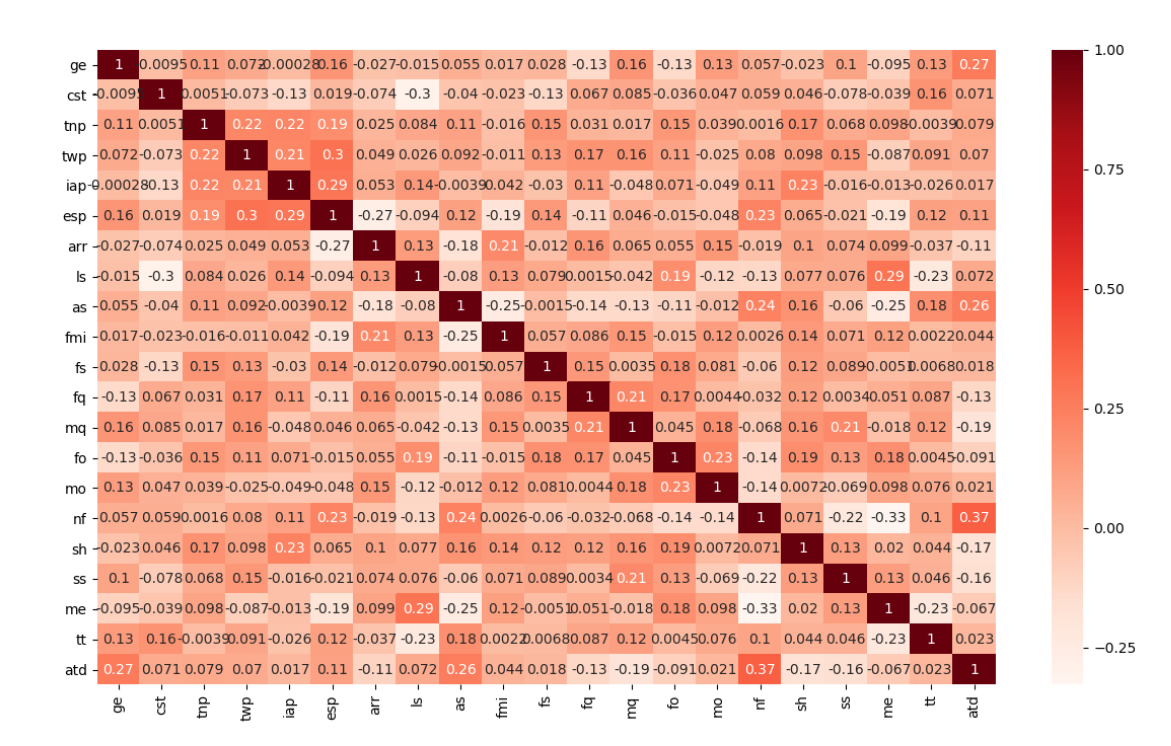


In [ ]:
# Your answer here (code + explanation):


# 1.)
import pandas as pd
url = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv'
df = pd.read_csv(url)

for col in df.columns:
    print("Column:",col)
    print("The no of rows are:", df[col].shape[0])
    print("The no of unique values in this column are:", df[col].value_counts().shape[0])
    print(df[col].value_counts())
    print()





Column: ge
The no of rows are: 131
The no of unique values in this column are: 2
M    72
F    59
Name: ge, dtype: int64

Column: cst
The no of rows are: 131
The no of unique values in this column are: 5
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

Column: tnp
The no of rows are: 131
The no of unique values in this column are: 4
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

Column: twp
The no of rows are: 131
The no of unique values in this column are: 4
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

Column: iap
The no of rows are: 131
The no of unique values in this column are: 4
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64

Column: esp
The no of rows are: 131
The no of unique values in this column are: 4
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

Column: arr
The no of rows are: 131
The no of unique values in this column are: 2
N    78
Y    53
Name: arr, dtyp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


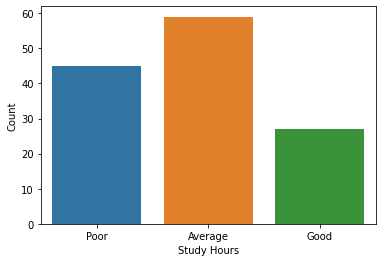

In [ ]:
# 2.)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df['sh'])
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


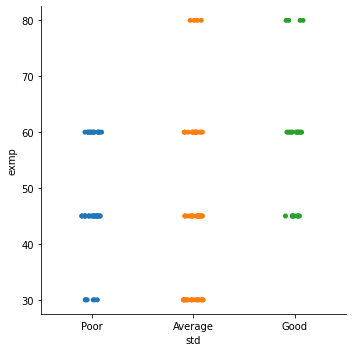

In [ ]:
# 3.)
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
url = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv'
df = pd.read_csv(url)
df['std']=pd.DataFrame(df.sh)
df['exmp']=pd.DataFrame(df.esp)
df['exmp'].mask(df['exmp'] == 'Fail', 30, inplace=False)
df['exmp'].mask(df['exmp'] == 'Pass', 30, inplace=True)
df['exmp'].mask(df['exmp'] == 'Good', 45, inplace=True)
df['exmp'].mask(df['exmp'] == 'Vg', 60, inplace=True)
df['exmp'].mask(df['exmp'] == 'Best', 80, inplace=True)
df['exam-percentange']=pd.DataFrame(df.esp)
sb.factorplot(x = "std", y = "exmp" , kind = 'strip',data = df)
plt.show()

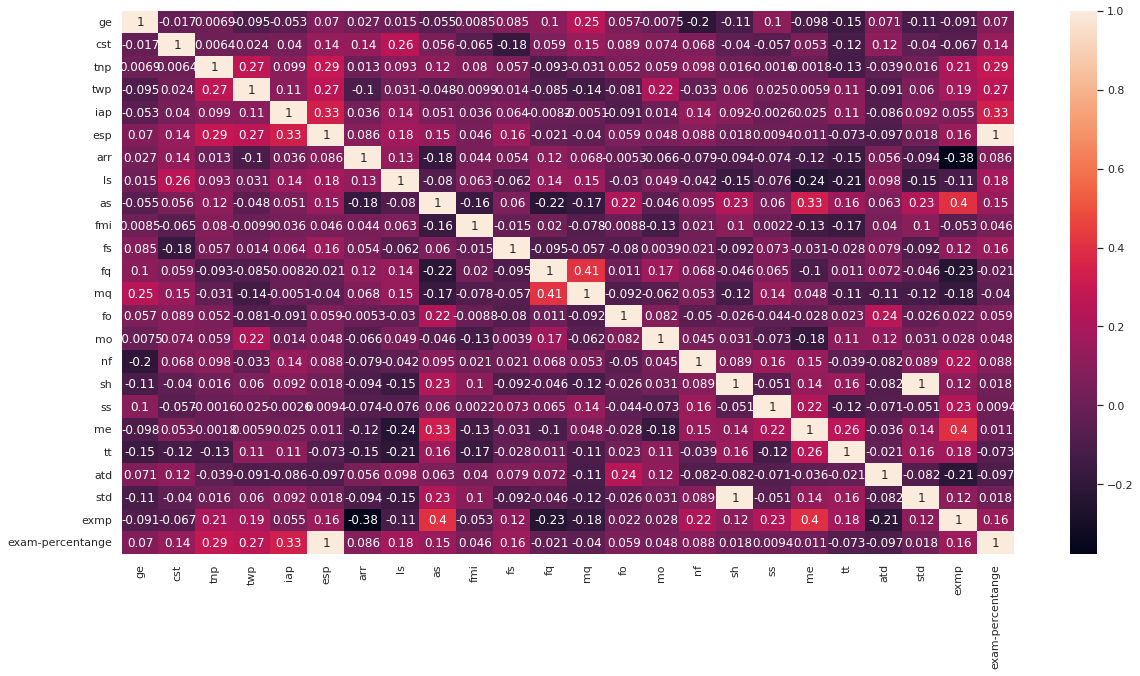

In [ ]:
#4) Heatmap after correlation
# Import label encoder 
from sklearn import preprocessing
import seaborn as sns
label_encoder = preprocessing.LabelEncoder()  
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = preprocessing.LabelEncoder()
    # categorical data to numerical data
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

df1 = Encoder(df)
# dropping the ms column
df1 = df1.drop('ms', axis = 1)

# Correlation data display
corr = df1.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr,annot=True)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
Please list your questions here:

Data set is taken from kaggle about university rankings (https://www.kaggle.com/tsaigau/qs-world-university-rankings-2017-2022-eda/data?scriptVersionId=87195564)

We will perform EDA on the data to know

1) Sample of the data frame

2) Inspecting bottom 5 and top 5 rows

3) visualization of missing values



'''

In [ ]:
# You code to answer the three questions (Please add comments in the code):

#1) Creating a sample with 5 columns

# Import the `pandas` library as `pd`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load in the data with `read_csv()`
digits = pd.read_csv("/content/sample_data/QS World University Rankings 2017.csv",
                     header=None)

# import `sample` from `random`
from random import sample

# Create a random index
randomIndex = np.array(sample(range(len(digits)), 5))

# Get 5 random rows
digitsSample = digits.iloc[randomIndex]

# Print the sample
print(digitsSample)






        0        1                          2     3  \
913  2017     701+      Yamaguchi University    NaN   
715  2017     701+          Auburn University   NaN   
120  2017      120  Universidade de São Paulo    59   
501  2017  491-500   Yokohama City University   NaN   
64   2017      =63      University of Glasgow  71.7   

                                                     4               5  \
913  https://www.topuniversities.com/universities/y...           Japan   
715  https://www.topuniversities.com/universities/a...   United States   
120  https://www.topuniversities.com/universities/u...          Brazil   
501  https://www.topuniversities.com/universities/y...           Japan   
64   https://www.topuniversities.com/universities/u...  United Kingdom   

                  6              7  \
913  Yamaguchi City           Asia   
715          Auburn  North America   
120       São Paulo  Latin America   
501   Yokohama City           Asia   
64          Glasgow         Europe

In [ ]:
#2) Inspecting first and last 5 rows of data

# Inspect the first 5 rows of `digits`
first = digits.head(5)

# Inspect the last 5 rows
last = digits.tail(5)

print(first)

print(last)

      0             1                                             2      3  \
0  year  rank_display                                    university  score   
1  2017             1  Massachusetts Institute of Technology (MIT)     100   
2  2017             2                           Stanford University   98.7   
3  2017             3                            Harvard University   98.3   
4  2017             4                       University of Cambridge   97.2   

                                                   4               5  \
0                                               link         country   
1  https://www.topuniversities.com/universities/m...   United States   
2  https://www.topuniversities.com/universities/s...   United States   
3  https://www.topuniversities.com/universities/h...   United States   
4  https://www.topuniversities.com/universities/u...  United Kingdom   

           6              7                                                  8  
0       city     

In [ ]:
#3) Finding out missing value in data and visualizing them
df=pd.read_csv('/content/sample_data/QS World University Rankings 2017.csv')
df.head()

,year,rank_display,university,score,link,country,city,region,logo
0,2017,1,Massachusetts Institute of Technology (MIT),100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
1,2017,2,Stanford University,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...
2,2017,3,Harvard University,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
3,2017,4,University of Cambridge,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...
4,2017,5,California Institute of Technology (Caltech),96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...


In [ ]:
#checking the missing values
df.isnull().sum()

year              0
rank_display     19
university        0
score           533
link              0
country           0
city             15
region            0
logo              0
dtype: int64

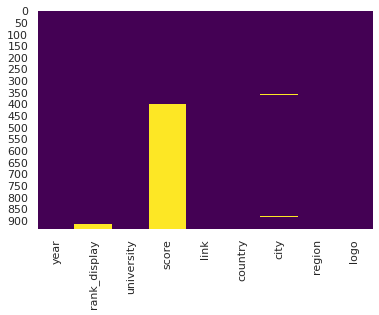

In [ ]:
# using heatmap to visualize the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')